In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder # for classification data
from sklearn.preprocessing import StandardScaler

import keras

In [3]:
#!pip install keras


In [4]:
df = pd.read_csv('2_feature_housing_data.csv')

In [5]:
df.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bedrooms     499 non-null    int64
 1   sqft_living  499 non-null    int64
 2   price        499 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


In [7]:
X = df.drop('price', axis=1)
y = df['price']

In [8]:
# feature standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled = pd.DataFrame(X_scaled)

In [10]:
X_scaled.head()

,0,1
0,-0.433198,-0.753258
1,1.675735,1.457330
2,-0.433198,-0.188649
3,-0.433198,-0.121661
4,0.621269,-0.179079


In [11]:
x1,x2 = X_scaled.iloc[0]
print(x1,x2)

-0.43319764280264655 -0.7532575369937701


In [12]:
Y=np.log(y) #it handles heterodacity means skewed data
Y

0      12.653958
1      14.684290
2      12.742566
3      12.948010
4      13.217674
         ...    
494    13.380102
495    13.764217
496    12.128111
497    12.721886
498    12.254863
Name: price, Length: 499, dtype: float64

In [13]:
model = keras.Sequential(
    [
        keras.layers.Dense(2,activation='sigmoid',name='layer1',input_shape=(X.shape[-1],)),
        keras.layers.Dense(1,activation='linear',name='layer2')
    ]
)
model.summary()

C:\Users\Ashish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

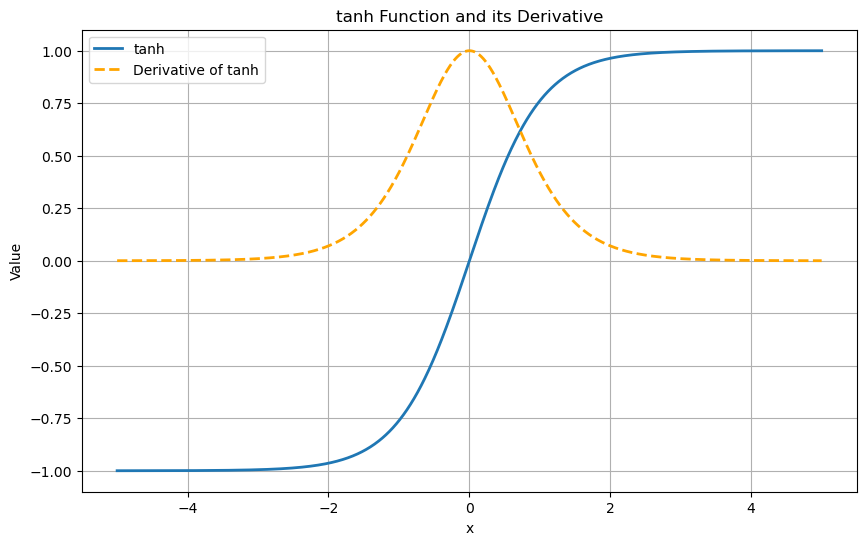

In [14]:
# graph of tanh and it's derivative

import numpy as np
import matplotlib.pyplot as plt

# Define tanh function
def tanh(x):
    return np.tanh(x)

# Derivative of tanh function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Generate x values
x = np.linspace(-5, 5, 1000)
y_tanh = tanh(x)
y_derivative = tanh_derivative(x)

# Plot tanh and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label='tanh', linewidth=2)
plt.plot(x, y_derivative, label='Derivative of tanh', linestyle='--', color='orange', linewidth=2)
plt.title('tanh Function and its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

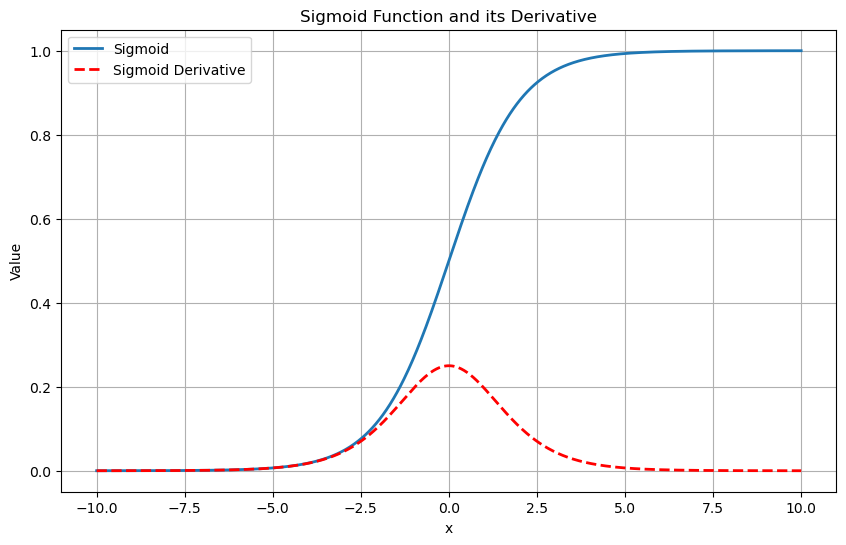

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Generate values from -10 to 10
x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# Plot the sigmoid and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(x, y_derivative, label='Sigmoid Derivative', linestyle='--', linewidth=2, color='red')
plt.title('Sigmoid Function and its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

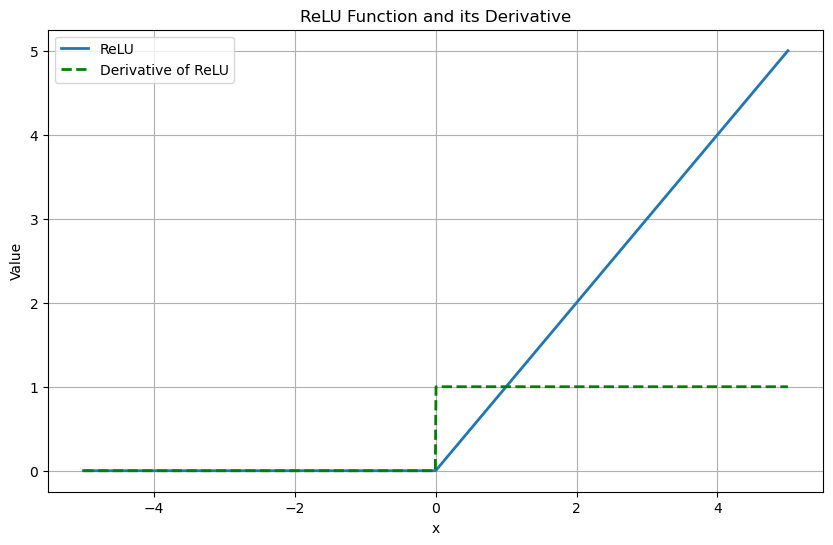

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x = np.linspace(-5, 5, 1000)
y_relu = relu(x)
y_derivative = relu_derivative(x)

# Plot ReLU and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label='ReLU', linewidth=2)
plt.plot(x, y_derivative, label='Derivative of ReLU', linestyle='--', color='green', linewidth=2)
plt.title('ReLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

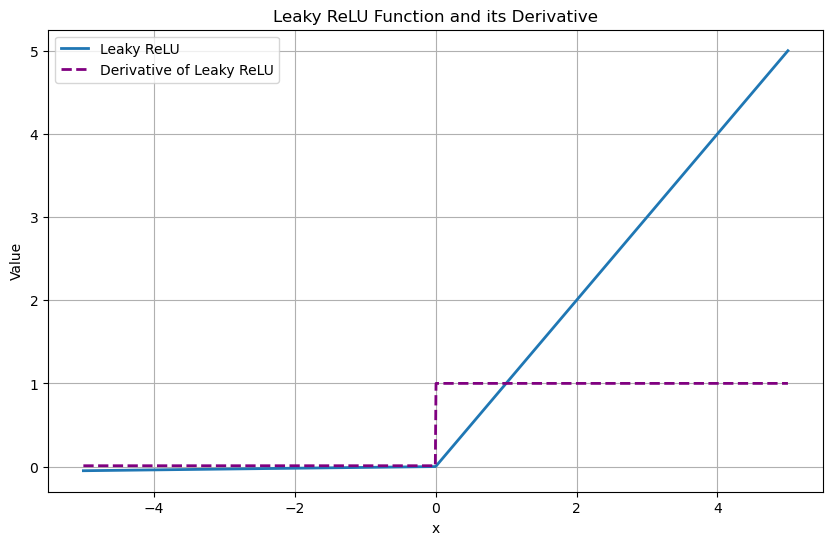

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU parameter (slope for x < 0)
alpha = 0.01

# Define Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Derivative of Leaky ReLU
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Generate x values
x = np.linspace(-5, 5, 1000)
y_leaky_relu = leaky_relu(x, alpha)
y_derivative = leaky_relu_derivative(x, alpha)

# Plot Leaky ReLU and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x, y_leaky_relu, label='Leaky ReLU', linewidth=2)
plt.plot(x, y_derivative, label='Derivative of Leaky ReLU', linestyle='--', color='purple', linewidth=2)
plt.title('Leaky ReLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


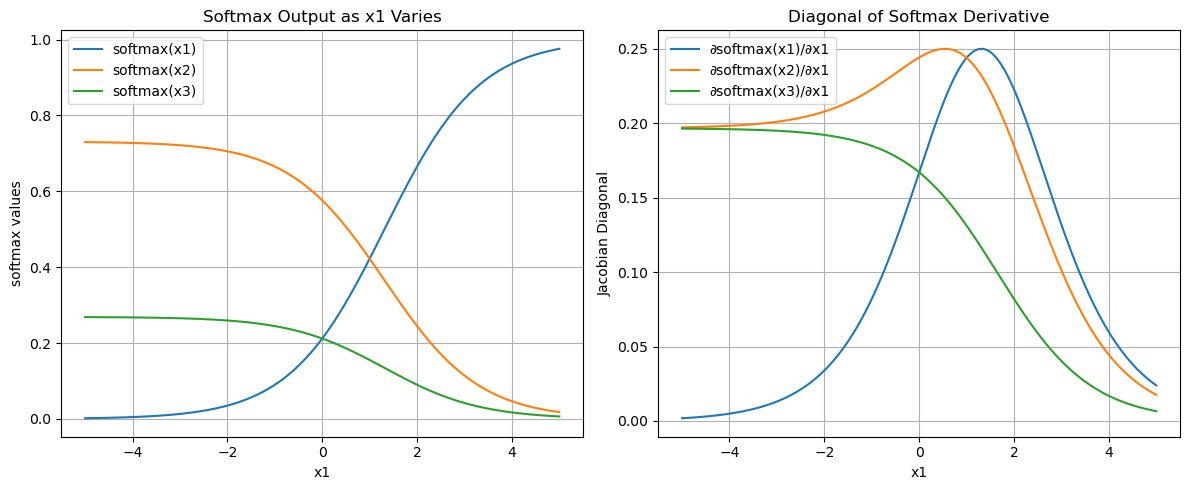

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function for a vector
def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum()

# Derivative of softmax (Jacobian matrix)
def softmax_derivative(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

# Generate x values by varying one element in a 3D vector
x_vals = np.linspace(-5, 5, 500)
softmax_outputs = []
softmax_derivatives = []

for x in x_vals:
    v = np.array([x, 1.0, 0.0])  # change 1st element only
    s = softmax(v)
    J = softmax_derivative(v)
    softmax_outputs.append(s)
    softmax_derivatives.append(np.diag(J))  # track diagonal of Jacobian

softmax_outputs = np.array(softmax_outputs)
softmax_derivatives = np.array(softmax_derivatives)

# Plot Softmax outputs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_vals, softmax_outputs[:, 0], label='softmax(x1)')
plt.plot(x_vals, softmax_outputs[:, 1], label='softmax(x2)')
plt.plot(x_vals, softmax_outputs[:, 2], label='softmax(x3)')
plt.title('Softmax Output as x1 Varies')
plt.xlabel('x1')
plt.ylabel('softmax values')
plt.legend()
plt.grid(True)

# Plot Diagonal of Derivative (Jacobian)
plt.subplot(1, 2, 2)
plt.plot(x_vals, softmax_derivatives[:, 0], label='∂softmax(x1)/∂x1')
plt.plot(x_vals, softmax_derivatives[:, 1], label='∂softmax(x2)/∂x1')
plt.plot(x_vals, softmax_derivatives[:, 2], label='∂softmax(x3)/∂x1')
plt.title('Diagonal of Softmax Derivative')
plt.xlabel('x1')
plt.ylabel('Jacobian Diagonal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

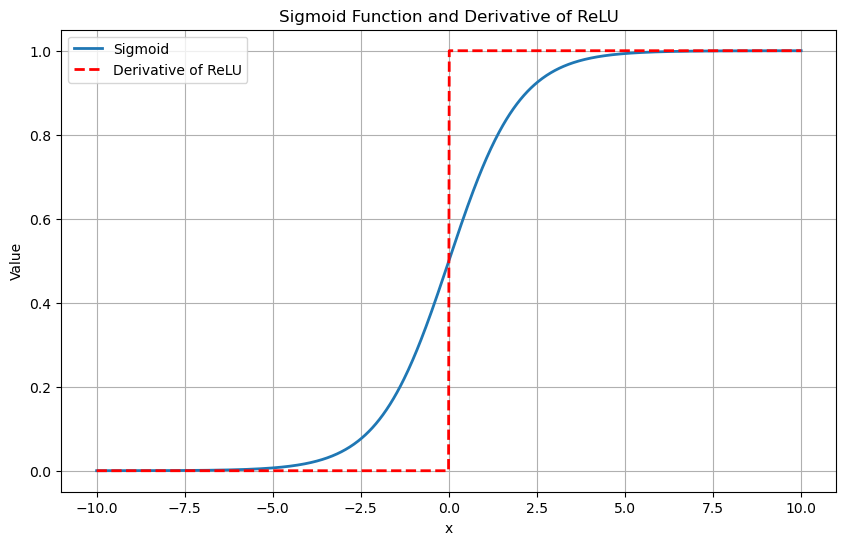

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_relu_derivative = relu_derivative(x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(x, y_relu_derivative, label='Derivative of ReLU', linestyle='--', color='red', linewidth=2)
plt.title('Sigmoid Function and Derivative of ReLU')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss='mse')

In [21]:
model.fit(X,Y.values,epochs=10,batch_size=32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 51.6353
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2579  
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2592
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2607  
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2520 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2562 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2650 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2559
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2777  
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2824


In [22]:
model.predict(X)[:,0]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 13.055748, 13.055748,
       13.055748, 13.055748, 13.055748, 13.055748, 

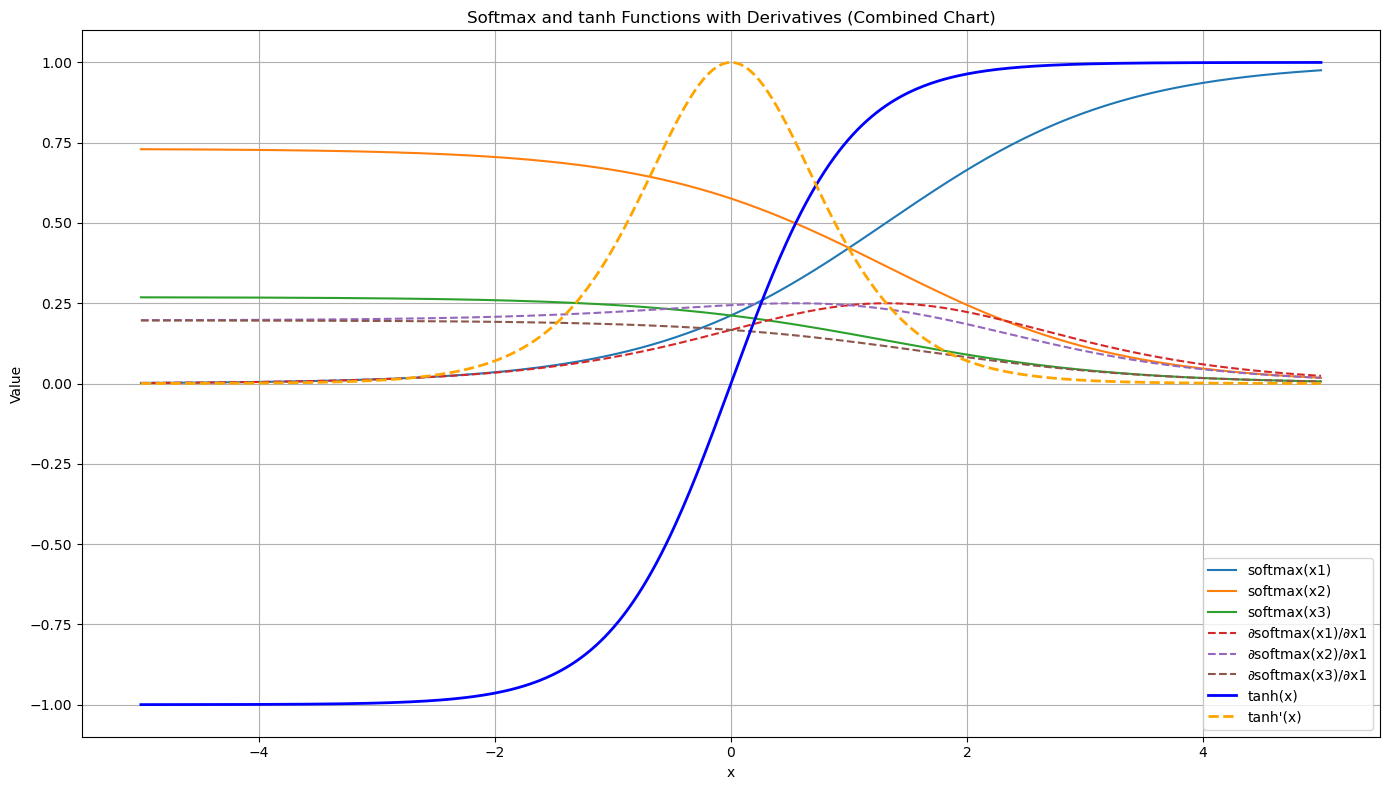

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function and its derivative
def softmax(x):
    e_x = np.exp(x - np.max(x))  # stability improvement
    return e_x / e_x.sum()

def softmax_derivative(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

# tanh function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Prepare input values
x_vals = np.linspace(-5, 5, 500)
x_tanh = x_vals  # same domain

# Initialize lists for softmax
softmax_outputs = []
softmax_derivatives = []

# Generate softmax outputs and derivatives
for x in x_vals:
    v = np.array([x, 1.0, 0.0])  # only x1 varies
    s = softmax(v)
    J = softmax_derivative(v)
    softmax_outputs.append(s)
    softmax_derivatives.append(np.diag(J))

softmax_outputs = np.array(softmax_outputs)
softmax_derivatives = np.array(softmax_derivatives)

# tanh and its derivative
y_tanh = tanh(x_tanh)0
y_tanh_derivative = tanh_derivative(x_tanh)

# Plot everything in one chart
plt.figure(figsize=(14, 8))

# Softmax outputs
plt.plot(x_vals, softmax_outputs[:, 0], label='softmax(x1)', linestyle='-')
plt.plot(x_vals, softmax_outputs[:, 1], label='softmax(x2)', linestyle='-')
plt.plot(x_vals, softmax_outputs[:, 2], label='softmax(x3)', linestyle='-')

# Softmax derivatives
plt.plot(x_vals, softmax_derivatives[:, 0], label='∂softmax(x1)/∂x1', linestyle='--')
plt.plot(x_vals, softmax_derivatives[:, 1], label='∂softmax(x2)/∂x1', linestyle='--')
plt.plot(x_vals, softmax_derivatives[:, 2], label='∂softmax(x3)/∂x1', linestyle='--')

# tanh and its derivative
plt.plot(x_tanh, y_tanh, label='tanh(x)', color='blue', linewidth=2)
plt.plot(x_tanh, y_tanh_derivative, label="tanh'(x)", color='orange', linestyle='--', linewidth=2)

# Labels and legend
plt.title('Softmax and tanh Functions with Derivatives (Combined Chart)')
plt.xlabel('x')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
